<a href="https://colab.research.google.com/github/Dedeepyamaddi/Data-Analytics/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Shape: (162980, 2)
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

Classification Report:
              precision    recall  f1-score   support

          -1       0.85      0.39      0.54      7230
           0       0.77      0.61      0.68     10961
           1       0.63      0.90      0.74     14404

    accuracy                           0.69     32595
   macro avg       0.75      0.64      0.65     32595
weighted avg       0.73      0.69      0.68     32595


Confusion Matrix:


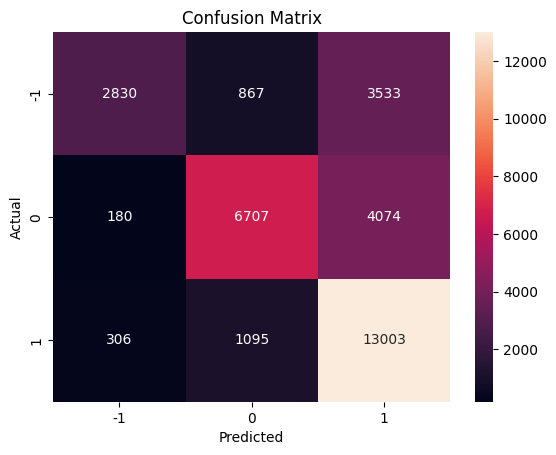


Accuracy: 69.15%

Sample Prediction:
Text: I love this new product!
Sentiment: 1


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

# -------------------------------
# 1. Load Dataset
# -------------------------------
df = pd.read_csv("/content/Twitter_Data.csv")
print("Original Shape:", df.shape)
print(df.head())

# -------------------------------
# 2. Clean the Text
# -------------------------------
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)  # remove @ and #
    text = re.sub(r'\d+', '', text)  # remove digits
    text = re.sub(r"[^\w\s]", '', text)  # remove punctuation
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['clean_text'].apply(clean_text)

# -------------------------------
# 3. Prepare Data
# -------------------------------
# Drop rows with missing values in the 'category' column
df.dropna(subset=['category'], inplace=True)

X = df['clean_text']
y = df['category'].astype(int)  # Expected to be: Positive, Negative, Neutral

# Encode labels if necessary
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# -------------------------------
# 4. TF-IDF Vectorization
# -------------------------------
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# -------------------------------
# 5. Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# -------------------------------
# 6. Train Model (Naive Bayes)
# -------------------------------
model = MultinomialNB()
model.fit(X_train, y_train)

# -------------------------------
# 7. Evaluate Model
# -------------------------------
y_pred = model.predict(X_test)

# Define target names based on the integer labels
target_names = ['-1', '0', '1'] # Assuming -1, 0, 1 correspond to your categories

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"\nAccuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# -------------------------------
# 8. Sample Prediction
# -------------------------------
def predict_sentiment(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)
    # Inverse transform the prediction to get the original label
    predicted_label = le.inverse_transform(prediction)[0]
    return predicted_label

# Try a custom tweet
print("\nSample Prediction:")
print("Text: I love this new product!")
print("Sentiment:", predict_sentiment("I love this new product!"))